In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Summarizing the data 
df.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,48.00,50.00,47.00,50.00
mean,76793.35,121344.64,224494.78,112012.64
std,44224.09,28017.80,113316.50,40306.18
min,542.05,51283.14,1903.93,14681.40
25%,45528.00,103730.88,139268.72,90138.90
50%,74661.72,122699.80,229160.95,107978.19
75%,105065.71,144842.18,301528.28,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [4]:
# Separating the independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [5]:
#Checking for any missing value
miss=df.isnull().any()
print("Missing value(s) in dataset:")
miss

Missing value(s) in dataset:


R&D Spend           True
Administration     False
Marketing Spend     True
State              False
Profit             False
dtype: bool

In [6]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 0:3])
X[:, 0:3] = imputer.transform(X[:, 0:3])

In [7]:
df.iloc[:,0:3]=X[:,0:3]
df.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,76793.35,121344.64,224494.78,112012.64
std,43312.15,28017.80,109792.85,40306.18
min,542.05,51283.14,1903.93,14681.40
25%,46117.03,103730.88,142431.38,90138.90
50%,75791.36,122699.80,224494.78,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


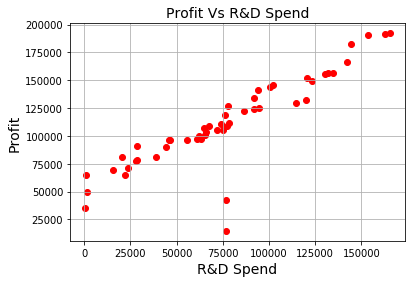

In [8]:
#Profit Vs R&D Spend
plt.scatter(df['R&D Spend'], df['Profit'], color='red')
plt.title('Profit Vs R&D Spend', fontsize=14)
plt.xlabel('R&D Spend', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

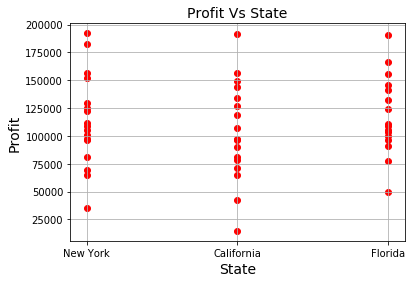

In [9]:
#Profit Vs State
plt.scatter(df['State'], df['Profit'], color='red')
plt.title('Profit Vs State', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

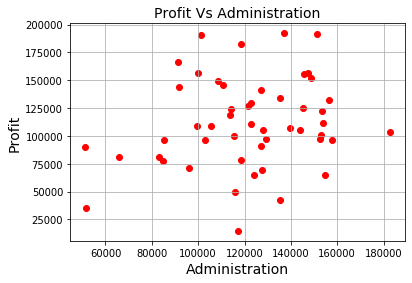

In [10]:
#Profit Vs Administration Spend
plt.scatter(df['Administration'], df['Profit'], color='red')
plt.title('Profit Vs Administration', fontsize=14)
plt.xlabel('Administration', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

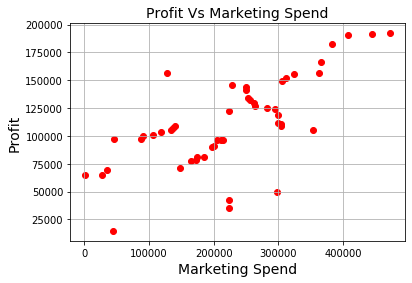

In [11]:
#
plt.scatter(df['Marketing Spend'], df['Profit'], color='red')
plt.title('Profit Vs Marketing Spend', fontsize=14)
plt.xlabel('Marketing Spend', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

c:\users\user\pycharmprojects\untitled3\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\user\pycharmprojects\untitled3\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [13]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [16]:
v=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
np.around(v,2)

,Actual,Predicted
0,144259.40,121119.39
1,78239.91,64830.90
2,124266.90,131286.94
3,81005.76,72418.48
4,35673.41,62103.12
5,134307.35,114550.69
6,132602.65,147894.01
7,107404.34,87435.65
8,65200.33,49822.08
9,81229.06,73085.20


In [17]:
print("R2-score of Training Set:")
regressor.score(X_train,y_train)

R2-score of Training Set:


0.7942948733487556

In [18]:
print("R2-score of Test Set:")
regressor.score(X_test,y_test)

R2-score of Test Set:


0.7478636432977157

In [19]:
# The coefficient & intercept
print ('Coefficient: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficient:  [ 1.37117639e+04  1.26212500e+04  7.04271310e-01 -1.49806145e-02
  6.80731490e-02]
Intercept:  34593.19398619133


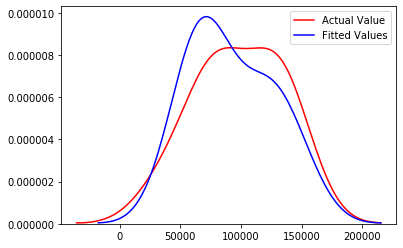

In [20]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)